In [3]:
%pip install pandas

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -------------- ------------------------- 3.9/11.0 MB 33.4 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 34.2 MB/s eta 0:00:00
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

   ---------------------------------------- 0/3 [pytz]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------

In [31]:
import openai

#openai.api_key = "not a key"

In [27]:
import pandas as pd
import openai

df = pd.read_csv("world_history.csv")
prompts = []
for _, row in df.iterrows():
    q = row["prompt"]
    choices = f"A. {row['A']}\nB. {row['B']}\nC. {row['C']}\nD. {row['D']}\nE. {row['E']}"
    prompt = f"{q}\n{choices}\nPlease only respond with the final answer (A, B, C, D, or E)."
    prompts.append(prompt)

# Send to GPT-4o and collect responses
responses = []
for prompt in prompts:
    response = openai.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": prompt}],
        max_tokens=20,
        temperature=0
    )
    answer = response.choices[0].message.content.strip()
    responses.append(answer)

# Write detailed output to file
with open("gpt4o__world_history_answers.txt", "w", encoding="utf-8") as f:
    for i in range(len(df)):
        f.write(f"Question {i+1}:\n{df.iloc[i]['prompt']}\n")
        f.write(f"Prompt Sent:\n{prompts[i]}\n")
        f.write(f"✅ Ground Truth Answer: {df.iloc[i]['answer']}\n")
        f.write(f"🤖 GPT-4o Answer: {responses[i]}\n")
        f.write("=" * 60 + "\n\n")


In [28]:
import re

def count_correct_answers(text: str) -> int:
    # Find all question blocks
    question_blocks = re.findall(
        r"✅ Ground Truth Answer: ([A-E])\s+🤖 GPT-4o Answer: ([A-E])(?:[.\s]|$)", text
    )

    # Count correct answers
    correct_count = sum(1 for gt, gpt in question_blocks if gt == gpt)
    return correct_count, len(question_blocks)

filename = "gpt4o__world_history_answers.txt"

with open(filename, "r", encoding="utf-8") as f:
    content = f.read()

correct, total = count_correct_answers(content)
accuracy = 100 * correct / total if total > 0 else 0

print(f"Correct: {correct} / {total} ({accuracy:.2f}%)")

with open("results.txt", "a", encoding="utf-8") as f:
    f.write(f"{filename}: {accuracy:.2f}% ({correct}/{total})\n")



Correct: 50 / 57 (87.72%)


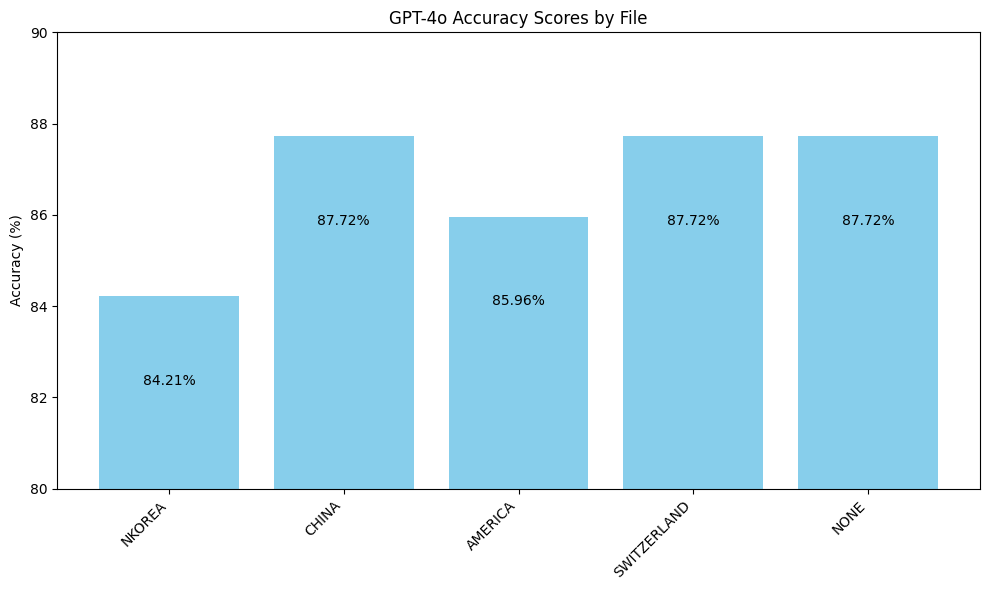

In [30]:
import matplotlib.pyplot as plt

# Data
files = [
    "NKOREA",
    "CHINA",
    "AMERICA",
    "SWITZERLAND",
    "NONE"
]

accuracies = [84.21, 87.72, 85.96, 87.72, 87.72]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(files, accuracies, color='skyblue')

# Add labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height - 2, f'{height:.2f}%', 
             ha='center', va='bottom', color='black', fontsize=10)

plt.title('GPT-4o Accuracy Scores by File')
plt.ylabel('Accuracy (%)')
plt.ylim(80, 90)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
